In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Dataset_Day11.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


In [3]:
colums = ['Glucose','BloodPressure','BMI','DiabetesPedigreeFunction']
data[colums] = data[colums].replace(0,float('NaN'))
data.isna().sum()

Pregnancies                  0
Glucose                      5
BloodPressure               35
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [4]:
data['Glucose'].fillna(data['Glucose'].median(),inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(),inplace=True)
data['BMI'].fillna(data['BMI'].median(),inplace=True)

In [5]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#2.	Then remove all existing outliers and get the final data for classification.

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [7]:
# 3.	Split the data into 80% training and 20% testing data. Use target variable as ‘Outcome’.
# a.	Use Bagging algorithm on Decision trees to classify Outcome and print the default model performance metrics: Accuracy, Precision, Recall, F1Score. Plot F1Score & accuracy against parameter: n_estimators with range of values from 2 to 25.
# b.	Use Random Forest algorithm to classify Outcome and print the default model performance metrics: Accuracy, Precision, Recall, F1Score. Plot F1Score * Accuracy against parameter: n_estimators with range of values from 2 to 25.
# c.	Use Adaboost algorithm on Decision trees to classify Outcome and print the default model performance metrics: Accuracy, Precision, Recall, F1Score.


X = data.drop('Outcome',axis=1)
Y = data['Outcome']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=99,test_size=0.2)
len(X_train),len(X_test)

(565, 142)

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("The F1 score of DT: {}".format(f1_score(y_test,y_pred)))
print("The Accuracy of DT: {}".format(accuracy_score(y_test,y_pred)))
print("The Precision of DT: {}".format((precision_score(y_test,y_pred))))
print(("The recall of DT: {}".format(recall_score(y_test,y_pred))))

The F1 score of DT: 0.4556962025316456
The Accuracy of DT: 0.6971830985915493
The Precision of DT: 0.4864864864864865
The recall of DT: 0.42857142857142855


The best Estimator: 17
The Maximum f1 score: 0.6067415730337079


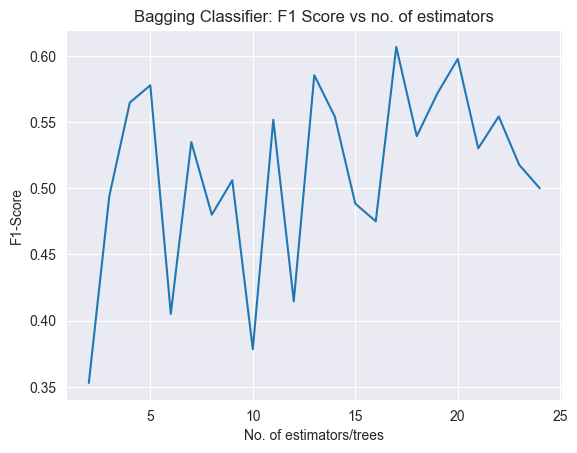

In [9]:
from sklearn.ensemble import BaggingClassifier

estimator_range = np.arange(2,25)

scores=[]

for i in estimator_range:
    clf = BaggingClassifier(n_estimators=i)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test,y_pred))

plt.plot(estimator_range,scores)
plt.xlabel("No. of estimators/trees")
plt.ylabel("F1-Score")
plt.title("Bagging Classifier: F1 Score vs no. of estimators")

max_f1_index = np.argmax(scores)
max_f1 = np.max(scores)
estimator = estimator_range[max_f1_index]
print("The best Estimator: {}".format(estimator))
print("The Maximum f1 score: {}".format(max_f1))

The estimator in Random forest: 13
The Maximum f1 score: 0.5526315789473685


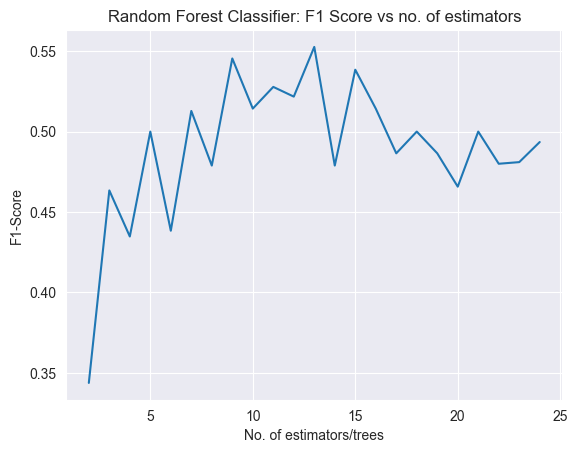

In [10]:
from sklearn.ensemble import RandomForestClassifier

estimator_range = np.arange(2,25)

scores = []

for i in estimator_range:
    rfc = RandomForestClassifier(n_estimators=i,random_state=99)
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict(X_test)
    scores.append(f1_score(y_test,y_pred))

plt.plot(estimator_range,scores)
plt.xlabel("No. of estimators/trees")
plt.ylabel("F1-Score")
plt.title("Random Forest Classifier: F1 Score vs no. of estimators")

max_f1_index = np.argmax(scores)
max_f1 = np.max(scores)
estimator = estimator_range[max_f1_index]
print("The estimator in Random forest: {}".format(estimator))
print("The Maximum f1 score: {}".format(max_f1))

In [11]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=13)

abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)

print("F1-Score of AdaBoost Classifier with n_estimator = 100 of Decision Tree is {}".format(f1_score(y_test, y_pred)))
print("Accuaracy of AdaBoost Classifier with n_estimator = 100 of Decision Tree is {}".format(accuracy_score(y_test, y_pred)))

F1-Score of AdaBoost Classifier with n_estimator = 100 of Decision Tree is 0.4827586206896552
Accuaracy of AdaBoost Classifier with n_estimator = 100 of Decision Tree is 0.6830985915492958


The estimator in Random forest: 20
The Maximum f1 score: 0.568421052631579


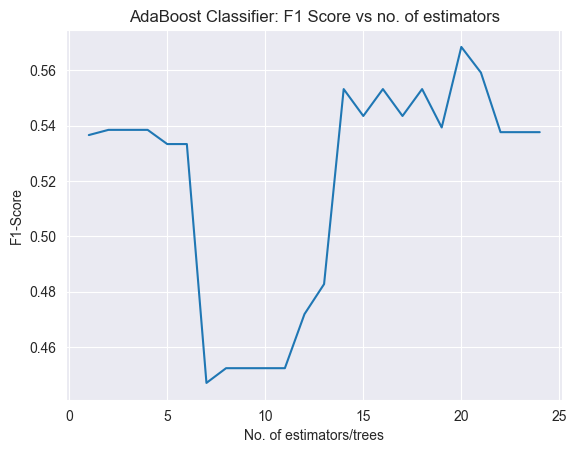

In [17]:
estimator_range = np.arange(1,25)

scores = []

for i in estimator_range:
    abc = AdaBoostClassifier(n_estimators=i)
    abc.fit(X_train,y_train)
    y_pred = abc.predict(X_test)
    scores.append(f1_score(y_test,y_pred))

plt.plot(estimator_range,scores)
plt.xlabel("No. of estimators/trees")
plt.ylabel("F1-Score")
plt.title("AdaBoost Classifier: F1 Score vs no. of estimators")

max_f1_index = np.argmax(scores)
max_f1 = np.max(scores)
estimator = estimator_range[max_f1_index]
print("The estimator in Ada boost : {}".format(estimator))
print("The Maximum f1 score: {}".format(max_f1))